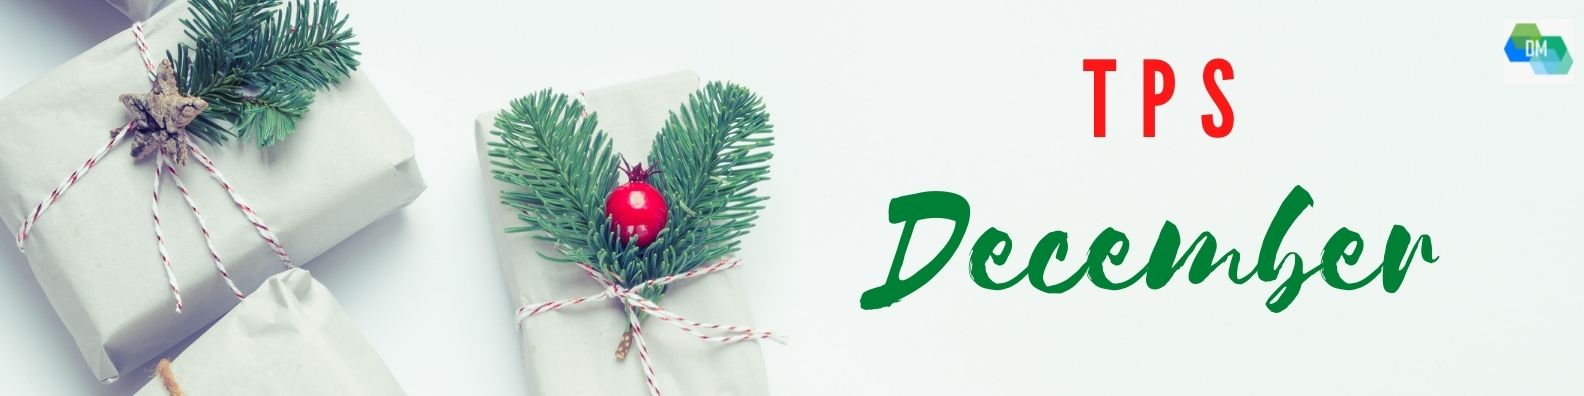

**Observations on this TPS dataset:**
- `Cover_Type` column is the target variable
- `Train` dataset has `40,00,000` rows and `56` columns which contains`54` features, `1` target variable `target` and `1` column of `id`
- `10` features are numerical and rest`44` features are categorical
- `Test` dataset has `10,00,000` rows and `55` columns which contains`54` features with`1` column of `id`
- No missing values in train and test dataset


<h3 style="font-family: Arial;background-color:#ff4d6d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datatable as dt

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

import warnings
warnings.filterwarnings('ignore')

<h3 style="font-family: Arial;background-color:#ff4d6d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [2]:
def reduce_memory_usage(df):
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != 'object':
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    pass
        else:
            df[col] = df[col].astype('category')
    return df

In [3]:
df_train = pd.read_csv('../input/tabular-playground-series-dec-2021/train.csv')
reduce_memory_usage(df_train)
df_test = pd.read_csv('../input/tabular-playground-series-dec-2021/test.csv')
reduce_memory_usage(df_test)
df_subm = pd.read_csv("../input/tabular-playground-series-dec-2021/sample_submission.csv")

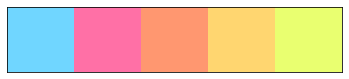

In [4]:
#Custom Color Palette 🎨
custom_colors = ["#70D6FF","#FF70A6","#FF9770","#FFD670","#E9FF70"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

In [5]:
df_train_row_count, df_train_column_count = df_train.shape
print('Total number of rows:', df_train_row_count)
print('Total number of columns:', df_train_column_count)

Total number of rows: 4000000
Total number of columns: 56


In [6]:
df_test_row_count, df_test_column_count = df_test.shape
print('Total number of rows:', df_test_row_count)
print('Total number of columns:', df_test_column_count)

Total number of rows: 1000000
Total number of columns: 55


In [7]:
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,...,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,...,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,...,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,...,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,...,0,0,0,0,0,0,0,0,0,2


In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,4000000.0,2.000000e+06,1.154701e+06,0.0,999999.75,1999999.5,2999999.25,3999999.0
Elevation,4000000.0,2.980192e+03,2.890482e+02,1773.0,2760.00,2966.0,3217.00,4383.0
Aspect,4000000.0,1.515857e+02,1.099611e+02,-33.0,60.00,123.0,247.00,407.0
Slope,4000000.0,1.509754e+01,8.546731e+00,-3.0,9.00,14.0,20.00,64.0
Horizontal_Distance_To_Hydrology,4000000.0,2.713154e+02,2.265497e+02,-92.0,110.00,213.0,361.00,1602.0
Vertical_Distance_To_Hydrology,4000000.0,5.166262e+01,6.821597e+01,-317.0,4.00,31.0,78.00,647.0
Horizontal_Distance_To_Roadways,4000000.0,1.766642e+03,1.315610e+03,-287.0,822.00,1436.0,2365.00,7666.0
Hillshade_9am,4000000.0,2.118375e+02,3.075996e+01,-4.0,198.00,218.0,233.00,301.0
Hillshade_Noon,4000000.0,2.210614e+02,2.223134e+01,49.0,210.00,224.0,237.00,279.0
Hillshade_3pm,4000000.0,1.408109e+02,4.369864e+01,-53.0,115.00,142.0,169.00,272.0


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 56 columns):
 #   Column                              Dtype
---  ------                              -----
 0   Id                                  int32
 1   Elevation                           int16
 2   Aspect                              int16
 3   Slope                               int8 
 4   Horizontal_Distance_To_Hydrology    int16
 5   Vertical_Distance_To_Hydrology      int16
 6   Horizontal_Distance_To_Roadways     int16
 7   Hillshade_9am                       int16
 8   Hillshade_Noon                      int16
 9   Hillshade_3pm                       int16
 10  Horizontal_Distance_To_Fire_Points  int16
 11  Wilderness_Area1                    int8 
 12  Wilderness_Area2                    int8 
 13  Wilderness_Area3                    int8 
 14  Wilderness_Area4                    int8 
 15  Soil_Type1                          int8 
 16  Soil_Type2                          

<h3 style="font-family: Arial;background-color:#ff4d6d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [10]:
df_train.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [11]:
df_test.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


<p style="font-family: Trebuchet MS; line-height: 2; font-size: 18px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #3a0ca3">There are no missing values.</p>

In [12]:
print ("Unique values are:\n",df_train.nunique())

Unique values are:
 Id                                    4000000
Elevation                                2525
Aspect                                    440
Slope                                      68
Horizontal_Distance_To_Hydrology         1636
Vertical_Distance_To_Hydrology            916
Horizontal_Distance_To_Roadways          7760
Hillshade_9am                             301
Hillshade_Noon                            221
Hillshade_3pm                             326
Horizontal_Distance_To_Fire_Points       8112
Wilderness_Area1                            2
Wilderness_Area2                            2
Wilderness_Area3                            2
Wilderness_Area4                            2
Soil_Type1                                  2
Soil_Type2                                  2
Soil_Type3                                  2
Soil_Type4                                  2
Soil_Type5                                  2
Soil_Type6                                  2
Soil_Type7    

In [13]:
df_train.drop(columns = 'Id', inplace = True)
df_test.drop(columns = 'Id', inplace = True)

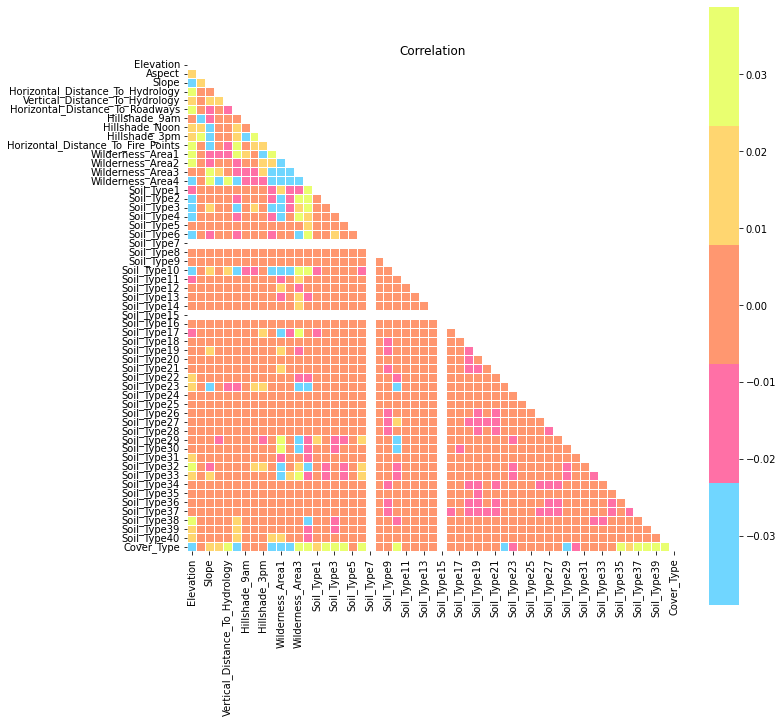

In [14]:
plt.figure(figsize = (11,11))
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=custom_colors, robust=True, center=0,square=True, linewidths =.6)
plt.title('Correlation')
plt.show()

In [15]:
df_train.drop(columns = ['Soil_Type7','Soil_Type15'], inplace = True)
df_test.drop(columns = ['Soil_Type7','Soil_Type15'], inplace = True)

In [16]:
df_train.Cover_Type.value_counts()

2    2262087
1    1468136
3     195712
7      62261
6      11426
4        377
5          1
Name: Cover_Type, dtype: int64

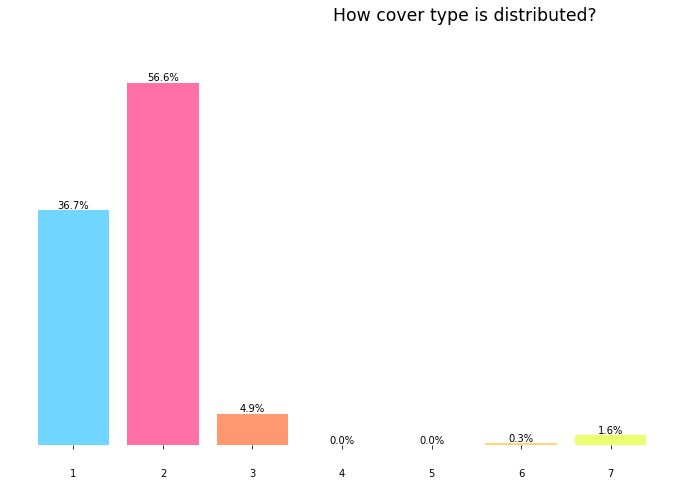

In [17]:
fig, ax = plt.subplots(figsize=(12,7))
bar_ch = ax.bar(df_train['Cover_Type'].value_counts().sort_index().index, df_train['Cover_Type'].value_counts().sort_index().values, color=['#70D6FF',"#FF70A6","#FF9770",'#70D6FF',"#FF70A6","#FFD670","#E9FF70"])
plt.text(3.9,2650000, 'How cover type is distributed?',{'font': 'Times New Roman','fontsize': 'xx-large','style':'normal'})
ax.tick_params(axis="x", pad=20)
ax.bar_label(bar_ch, [f"{x*100:2.1f}%" for x in df_train['Cover_Type'].value_counts().sort_index().values/len(df_train)])
ax.set_xticklabels(('0','1', '2', '3','4','5','6','7'))
ax.axes.get_xaxis().set_visible(True)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

<p style="font-family: Trebuchet MS; line-height: 2; font-size: 14px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #3a0ca3">Target distribution is imbalanced. Covertype 2 is the most dominated. There is no existence of Covertype 4 and 5.</p>

In [18]:
# define dataset
X = df_train.drop('Cover_Type', axis=1)
y = df_train['Cover_Type']

In [19]:
from sklearn.model_selection import train_test_split

# creating dataset split for prediction
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (3200000, 52)
y_train: (3200000,)
X_test: (800000, 52)
y_test: (800000,)


<h3 style="font-family: Arial;background-color:#ff4d6d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>XGBOOST </centre></strong></h3>

In [20]:
import xgboost as xgb
from xgboost import XGBClassifier
model1 = XGBClassifier(random_state=42,n_estimators= 500,learning_rate=0.05,eval_metric="auc",
                      max_depth=8,booster='gbtree',verbosity=0,tree_method = 'gpu_hist',task_type="GPU")
model1.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=2,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, task_type='GPU', tree_method='gpu_hist',
              validate_parameters=1, ...)

In [21]:
predicted1 = model1.predict(X)

Confusion Matrix
[[1422523   38908       0       0       0       0    6705]
 [  38167 2205848   17325       0       0     602     145]
 [      0   18060  176655       0       0     997       0]
 [      0       0       0     377       0       0       0]
 [      0       1       0       0       0       0       0]
 [      0     848    2720       0       0    7858       0]
 [  14520     234       0       0       0       0   47507]]


Accuracy of XGBoost: 96.52 

              precision    recall  f1-score   support

           1       0.96      0.97      0.97   1468136
           2       0.97      0.98      0.97   2262087
           3       0.90      0.90      0.90    195712
           4       1.00      1.00      1.00       377
           5       0.00      0.00      0.00         1
           6       0.83      0.69      0.75     11426
           7       0.87      0.76      0.81     62261

    accuracy                           0.97   4000000
   macro avg       0.79      0.76      0.77   4000

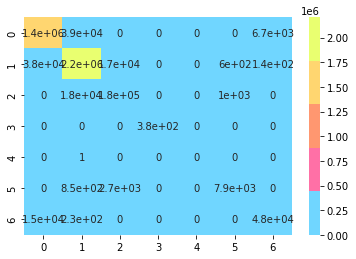

In [22]:
m1_cm = confusion_matrix(y, predicted1)
m1_acc_score = accuracy_score(y, predicted1)
print("Confusion Matrix")
print(m1_cm)
sns.heatmap(m1_cm, annot=True,cmap=custom_colors)
print("\n")
print("Accuracy of XGBoost:",round(m1_acc_score*100,2),'\n')
print(classification_report(y,predicted1))

In [23]:
y_pred1 = model1.predict(df_test)

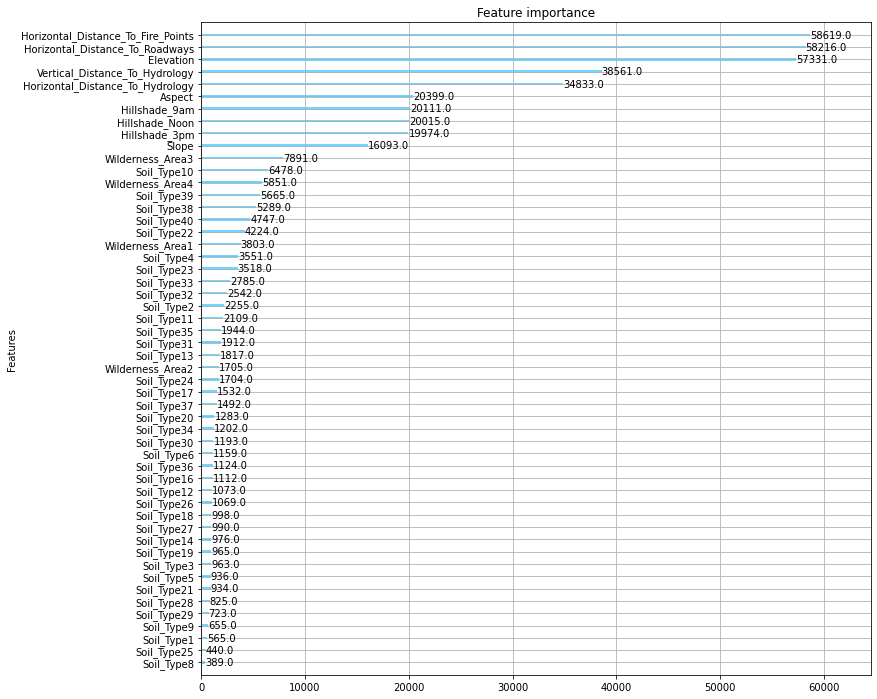

In [24]:
from xgboost import plot_importance
fig, ax = plt.subplots(1,1,figsize=(12,12))
plot_importance(model1, ax=ax, xlabel=None)
plt.show()

In [25]:
df_subm['Cover_Type'] = y_pred1
df_subm

,Id,Cover_Type
0,4000000,2
1,4000001,2
2,4000002,2
3,4000003,2
4,4000004,2
...,...,...
999995,4999995,2
999996,4999996,1
999997,4999997,2
999998,4999998,1


In [26]:
df_subm.to_csv('submission_xgb.csv', index=False)

<h3 style="font-family: Arial;background-color:#ff4d6d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>CATBOOST </centre></strong></h3>

In [27]:
from catboost import CatBoostClassifier
model2 = CatBoostClassifier(random_state=42,max_depth = 3, iterations = 5000,learning_rate=0.005,
                           early_stopping_rounds=50,task_type="GPU")
model2.fit(X,y, verbose=0)

In [28]:
predicted2 = model2.predict(X)

Confusion Matrix
[[1411437   52882       0       0       0       0    3817]
 [  76280 2165236   20071       0       0     352     148]
 [      0   56381  138400       0       0     931       0]
 [      0       0     374       0       0       3       0]
 [      0       1       0       0       0       0       0]
 [      0    1857    7233       0       0    2336       0]
 [  41113     198       0       0       0       0   20950]]


Accuracy of CatBoost: 93.46 

              precision    recall  f1-score   support

           1       0.92      0.96      0.94   1468136
           2       0.95      0.96      0.95   2262087
           3       0.83      0.71      0.77    195712
           4       0.00      0.00      0.00       377
           5       0.00      0.00      0.00         1
           6       0.64      0.20      0.31     11426
           7       0.84      0.34      0.48     62261

    accuracy                           0.93   4000000
   macro avg       0.60      0.45      0.49   400

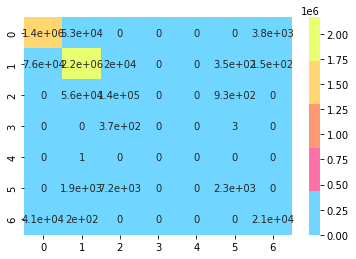

In [29]:
m2_cm = confusion_matrix(y, predicted2)
m2_acc_score = accuracy_score(y, predicted2)
print("Confusion Matrix")
print(m2_cm)
sns.heatmap(m2_cm, annot=True,cmap=custom_colors)
print("\n")
print("Accuracy of CatBoost:",round(m2_acc_score*100,2),'\n')
print(classification_report(y,predicted2))

In [30]:
y_pred2 = model2.predict(df_test)

In [31]:
df_subm['Cover_Type'] = y_pred2
df_subm

,Id,Cover_Type
0,4000000,2
1,4000001,2
2,4000002,2
3,4000003,2
4,4000004,2
...,...,...
999995,4999995,2
999996,4999996,1
999997,4999997,2
999998,4999998,1


In [32]:
df_subm.to_csv('submission_catb.csv', index=False)

<h3 style="font-family: Arial;background-color:#ff4d6d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>If you found this notebook useful, please Upvote. Thanks! </centre></strong></h3>